### dilated conv
ref
https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md


In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import os   
import cv2
from utils import show_image_mask
import numpy as np
import torch.optim as optim

In [2]:
cmd = '''mkdir ./data
wget -q https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420937454-1629951595/capsule.tar.xz -O data/MVtech-capsule.tar.xz
tar -Jxf data/MVtech-capsule.tar.xz --overwrite --directory ./data
'''
if not os.path.isdir('./data/capsule'):
    for i in cmd.split('\n'):
        os.system(i)

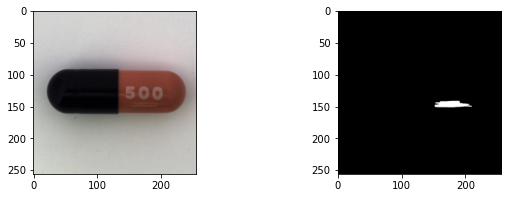

In [3]:
i = '001'
image_ = cv2.imread(f'{os.getcwd()}/data/capsule/test/scratch/{i}.png')
image_ = cv2.cvtColor(image_, cv2.COLOR_BGR2RGB)

mask_ = cv2.imread(f'{os.getcwd()}/data/capsule/ground_truth/scratch/{i}_mask.png', cv2.IMREAD_GRAYSCALE)

image_ = cv2.resize(image_, (256, 256), interpolation=cv2.INTER_AREA)
mask_ = cv2.resize(mask_, (256, 256), interpolation=cv2.INTER_AREA)
show_image_mask(image_, mask_)

torch.Size([1, 3, 256, 256])
torch.Size([1, 1, 256, 256])


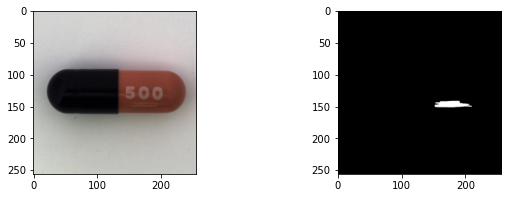

In [4]:
image = torch.Tensor(image_).unsqueeze(0).permute(0,3,1,2)
mask = torch.Tensor(mask_)[...,None,None].permute(2,3,0,1)

print(image.shape)
print(mask.shape)
show_image_mask(image, mask)

In [5]:
x = image
x = nn.Conv2d(3, 9, kernel_size=3, stride=2, padding=1, dilation=(1,1))(x)
x.shape

torch.Size([1, 9, 128, 128])

In [6]:
x = image
x = nn.Conv2d(3, 9, kernel_size=3, stride=2, padding=2, dilation=(2,2))(x)
x.shape

torch.Size([1, 9, 128, 128])

In [7]:
x = image
x = nn.Conv2d(3, 9, kernel_size=3, stride=2, padding=3, dilation=(3,3))(x)
x.shape

torch.Size([1, 9, 128, 128])

In [31]:
class dilated_convBlock(nn.Module):
    def __init__(self, in_ch, out_ch, stride=2):
        super().__init__()
        self.dilated_rate= [9,9,9]
        self.dilatedConv = lambda rate:nn.Conv2d(in_ch, out_ch, kernel_size=3,
                                                 stride=stride, padding=rate, dilation=(rate,rate))
        self.relu        = nn.ReLU()
        self.INorm       = torch.nn.InstanceNorm2d()
    def forward(self, x):
        tmp = x
        for i in range(len(self.dilated_rate)):
            x = self.dilatedConv(self.dilated_rate[i])(x)
            x = self.relu(x)
            x = self.INorm(x)
#         x = x + tmp
#         x = torch.cat([tmp,x], dim=1)
        return x

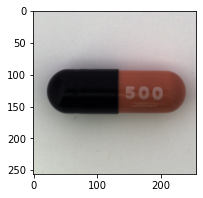

torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])


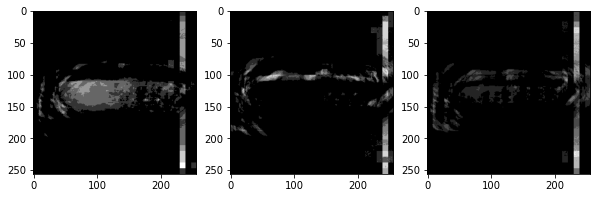

In [32]:
x = image

show_image_mask(x)
print(x.shape)
for i in range(2):
    x = dilated_convBlock(3,3,1)(x)

print(x.shape)

# show_image_mask(x)
show_image_mask(*torch.tensor_split(x, 3, dim=1))
